In [1]:
%load_ext autoreload
%autoreload 1
%aimport spectrum
import matplotlib.pyplot as plt

In [2]:
%aimport

Modules to reload:
spectrum

Modules to skip:



In [3]:
data = spectrum.parse_jcampdx(spectrum.get_jcampdx('C57136', 0))
data

{'title': 'UREA',
 'jcamp-dx': 4.24,
 'data type': 'INFRARED SPECTRUM',
 'class': 'COBLENTZ III',
 'origin': 'DOW CHEMICAL COMPANY',
 'owner': 'COBLENTZ SOCIETY\nCollection (C) 2018 copyright by the U.S. Secretary of Commerce\non behalf of the United States of America. All rights reserved.',
 'date': '1963/11/27',
 'cas registry no': '57-13-6',
 'molform': 'C H4 N2 O',
 'source reference': 'COBLENTZ NO. 10212',
 '$nist source': 'COBLENTZ',
 '$nist image': 'cob10212',
 'spectrometer/data system': 'DOW KBr FOREPRISM-GRATING',
 'instrument parameters': 'BLAZED AT 3.5, 12.0, 20.0 MICRON, CHANGED AT 5.0, 7.5, 14.9 MICRON',
 'state': 'SOLID (SPLIT MULL, FLUOROLUBE FOR 3800-1333 AND NUJOL FOR 1333-450 CM ^-^1)',
 'sampling procedure': 'TRANSMISSION',
 'resolution': 4,
 'data processing': 'DIGITIZED BY NIST FROM HARD COPY (FROM TWO SEGMENTS)',
 'xunits': '1/CM',
 'yunits': 'TRANSMITTANCE',
 'xfactor': 1.0,
 'yfactor': 1,
 'deltax': 0.85276,
 'firstx': 449.687,
 'lastx': 3801.88,
 'firsty': 0.1

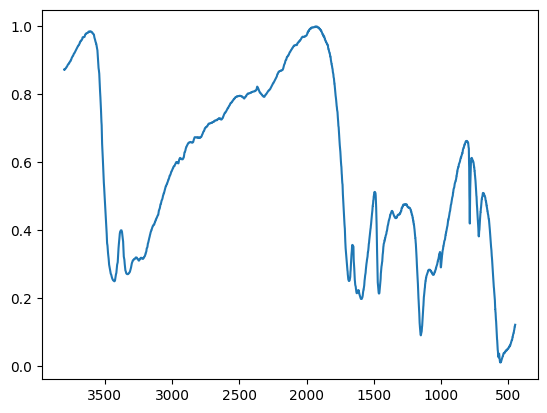

In [4]:
plt.plot(data['x'], data['y'])
plt.gca().invert_xaxis()

[True, True]
ABSORBANCE
[False, False]
ABSORBANCE
[True, False]
TRANSMITTANCE


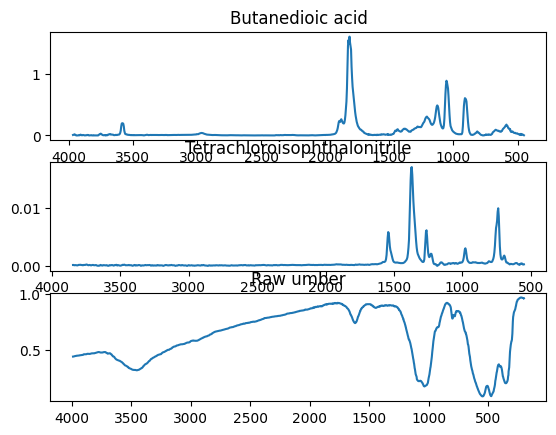

In [10]:
# example for plotting

results = spectrum.search('*ber')
nrows = len(results)
for i, k in enumerate(results):
    data = spectrum.parse_jcampdx(spectrum.get_jcampdx(k,0))
    print(spectrum.spectra_match(data, [spectrum.PeakCriteria((500,600)), spectrum.PeakCriteria((1500, 2000), 1)]))
    print(data['yunits'])
    plt.subplot(nrows, 1, i+1)
    plt.plot(data['x'], data['y'])
    plt.gca().invert_xaxis()
    plt.title(results[k][0])

In [18]:
import numpy as np
from spectrum import PeakCriteria

# filter amides by requiring they have the desired peaks
results = spectrum.search('*amide')
peaks = [PeakCriteria((500, 800)),
         PeakCriteria((1250, 1300)),
         PeakCriteria((1500, 1700), 1), #this ensures the peak in this region is the strongest of all
         PeakCriteria((2000, 2750), 0), #this ensures the region is flat
         PeakCriteria((3000, 3150), 0.6),
         PeakCriteria((3300, 3600))]

filtered_spectra = dict()
reject_spectra = dict()
spectra_matches = dict()
for k in results:
    try:
        data = spectrum.parse_jcampdx(spectrum.get_jcampdx(k,0))
    except:
        continue
    matches = spectrum.spectra_match(data, peaks)
    spectra_matches[k] = matches
    
    if np.sum(matches) >= 5 and matches[3]: # allow some wiggle-room; doesn't have to be perfect match
        filtered_spectra[k] = results[k]
        print(f'{",".join([str(m)[0] for m in matches])}| adding {k}: {results[k][0]}')
    else:
        reject_spectra[k] = results[k]
        print(f'{",".join([str(m)[0] for m in matches])}| rejecting {k}: {results[k][0]}')

print(len(filtered_spectra)/float(len(results)))
filtered_spectra

T,T,F,T,F,T| rejecting C137586: Lidocaine
F,T,F,T,F,F| rejecting C68122: Formamide, N,N-dimethyl-
T,T,F,F,T,T| rejecting C57136: Urea
T,T,T,F,T,T| rejecting C62442: Phenacetin
T,T,F,T,F,T| rejecting C60355: Acetamide
T,T,T,T,T,F| adding C77214: Glutethimide
T,T,F,T,F,T| rejecting C105602: Caprolactam
T,T,T,T,F,T| adding C57534: Meprobamate
T,T,T,T,F,F| rejecting C127195: N,N-Dimethylacetamide
T,T,F,T,F,T| rejecting C60515: Dimethoate
T,T,F,T,F,T| rejecting C75127: Formamide
T,T,T,T,F,T| adding C103844: Acetamide, N-phenyl-
T,T,T,F,F,T| rejecting C79050: Propanamide
F,F,F,F,F,F| rejecting C65452: Salicylamide
T,T,T,T,F,F| rejecting C103902: Acetaminophen
T,T,F,T,F,T| rejecting C79163: Acetamide, N-methyl-
T,T,F,T,F,T| rejecting C55210: Benzamide
T,T,T,T,F,F| rejecting C15972608: Alachlor
T,T,T,T,F,F| rejecting C611745: Benzamide, N,N-dimethyl-
T,T,F,F,F,T| rejecting C62566: Thiourea
T,T,F,T,F,T| rejecting C298464: Carbamazepine
T,T,F,T,F,T| rejecting C123397: Formamide, N-methyl-
T,T,F,

T,T,T,T,F,F| rejecting C759228: Acetamide, N,N-bis(1-methylethyl)-
F,F,F,F,F,F| rejecting C1120076: Nonanamide
F,T,F,T,F,F| rejecting C93834: Oleic diethanolamide
T,T,F,T,F,T| rejecting C2008584: Benzamide, 2,6-dichloro-
T,T,F,T,F,T| rejecting C6961826: 2-Chlorobenzenesulfonamide
T,T,F,T,F,T| rejecting C6343540: N-Benzylformamide
T,T,F,T,F,F| rejecting C6338687: N,N-Dimethylethanesulfonamide
T,T,F,T,F,T| rejecting C83158: Acetamide, N-antipyrinyl-
F,F,F,F,F,F| rejecting C93265: Acetamide, N-(2-methoxyphenyl)-
T,T,F,T,F,F| rejecting C1547871: N,N-Dimethyltrifluoroacetamide
T,T,T,F,T,T| rejecting C87172: Salicylanilide
T,T,T,T,F,F| rejecting C3393962: 4'-Nitrobenzanilide
F,F,F,F,F,F| rejecting C545595: Racemoramide
T,T,T,T,F,F| rejecting C51218452: Metolachlor
T,T,F,T,F,T| rejecting C3206733: Lipoamide
T,T,T,T,F,T| adding C4771088: N-(m-Nitrophenyl)benzamide
F,F,F,F,F,F| rejecting C622151: Methanimidamide, N,N'-diphenyl-
T,T,F,T,F,T| rejecting C80308: Benzenesulfonamide, N-cyclohexyl-4-m

T,T,T,T,F,T| adding C107584: 2-Propenamide, N-(1,1-dimethylethyl)-
T,T,T,T,F,F| rejecting C15394306: N,N,N',N'-Tetraethylterephthalamide
T,T,F,T,F,T| rejecting C95170: Bicyclo(2.2.1)-5-heptene-2-carboxamide
T,T,T,F,F,T| rejecting C1871892: N,N'-Bis-(2-hydroxyethyl)-oxamide
T,T,T,F,T,T| rejecting C526089: Sulfaphenazole
T,T,T,F,T,T| rejecting C64160389: Benzamide, N-(2-chloro-4-nitrophenyl)-
T,T,F,T,F,T| rejecting C344627: Alpha,alpha,alpha-trifluoro-o-acetotoluidide
T,T,F,F,F,T| rejecting C120978: Dichlorphenamide
T,T,T,T,F,F| rejecting C13698878: N,N,N',N'-Tetraethylisophthalamide
T,T,F,T,F,F| rejecting C17709954: N,N-Dimethyl phenyl(thioacetamide)
T,F,F,F,F,T| rejecting C51908293: 4-Isothiocyanatobenzenesulfonamide
T,T,T,T,F,T| adding C38411175: 2',5'-Dichloro-4'-nitroacetanilide
F,F,F,F,F,F| rejecting C599860: Benzenesulfonamide, 4-methyl-N-(4-methylphenyl)-
T,T,F,T,F,T| rejecting C6948012: N-(«alpha»-Methylbenzyl)-formamide
T,T,F,T,F,T| rejecting C5811881: 8-Carboxynaphyhalene-1-ca

{'C77214': ('Glutethimide',
  ['  (C', <sub>13</sub>, 'H', <sub>15</sub>, 'NO', <sub>2</sub>, ')']),
 'C57534': ('Meprobamate',
  ['  (C',
   <sub>9</sub>,
   'H',
   <sub>18</sub>,
   'N',
   <sub>2</sub>,
   'O',
   <sub>4</sub>,
   ')']),
 'C103844': ('Acetamide, N-phenyl-',
  ['  (C', <sub>8</sub>, 'H', <sub>9</sub>, 'NO)']),
 'C77656': ('Carbromal',
  ['  (C',
   <sub>7</sub>,
   'H',
   <sub>13</sub>,
   'BrN',
   <sub>2</sub>,
   'O',
   <sub>2</sub>,
   ')']),
 'C541355': ('Butanamide', ['  (C', <sub>4</sub>, 'H', <sub>9</sub>, 'NO)']),
 'C709988': ('Propanil',
  ['  (C', <sub>9</sub>, 'H', <sub>9</sub>, 'Cl', <sub>2</sub>, 'NO)']),
 'C85790': ('Dibucaine',
  ['  (C',
   <sub>20</sub>,
   'H',
   <sub>29</sub>,
   'N',
   <sub>3</sub>,
   'O',
   <sub>2</sub>,
   ')']),
 'C613934': ('Benzamide, N-methyl-',
  ['  (C', <sub>8</sub>, 'H', <sub>9</sub>, 'NO)']),
 'C5331486': ('N-(n-Propyl)acetamide',
  ['  (C', <sub>5</sub>, 'H', <sub>11</sub>, 'NO)']),
 'C5234684': ('Carboxin',
  

In [21]:
l = list(filtered_spectra) # list of keys that are for good matches
print(len(l))

53


0 Glutethimide [True, True, True, True, True, False]
1 Meprobamate [True, True, True, True, False, True]
2 Acetamide, N-phenyl- [True, True, True, True, False, True]
3 Carbromal [True, True, True, True, False, True]
4 Butanamide [True, True, True, True, False, True]


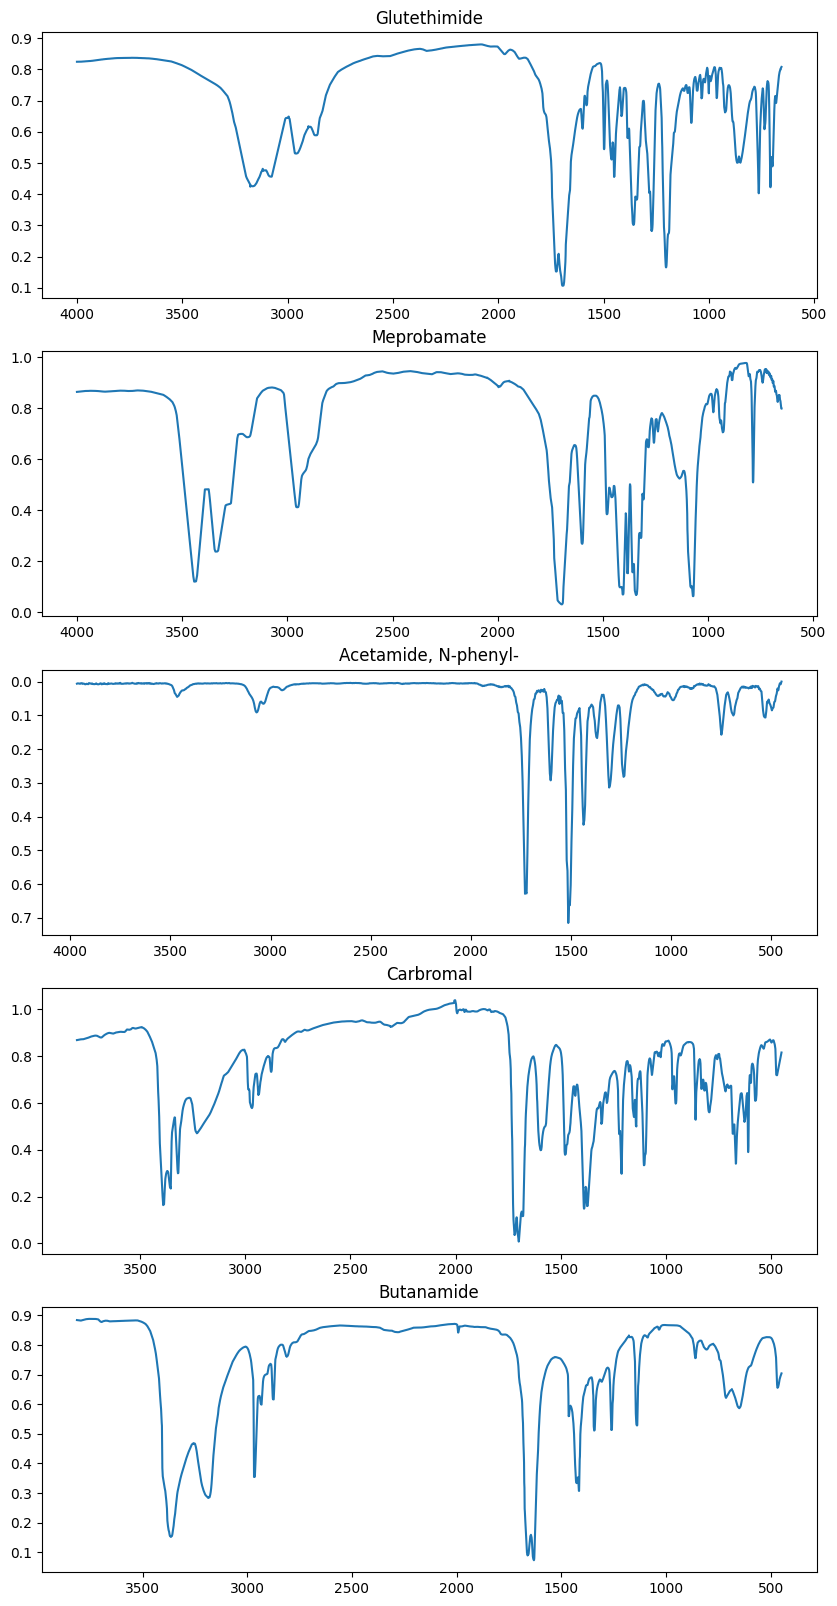

In [22]:
start = 
nrows = 5
plt.figure(figsize=(10,15))

for i, k in enumerate(l[start:start+nrows]):
    data = spectrum.parse_jcampdx(spectrum.get_jcampdx(k,0))
    plt.subplot(nrows, 1, i+1)
    plt.plot(data['x'], data['y'])
    plt.gca().invert_xaxis()
    if data.get('yunits') == 'ABSORBANCE':
        plt.gca().invert_yaxis() # make it appear as a transmittance plot would
    title = filtered_spectra[k][0]
    plt.title(title)
    print(f'{i} {title} {spectra_matches[k]}')